<a href="https://colab.research.google.com/github/HamedTabkhi/Intro-to-ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = 'https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [ ]:
# Separate features and labels
X = df.values[:, 0]  # get input values from first column -- X is a list here
y = df.values[:, 1]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97
n =  97


In [ ]:
print('X = ', X[: 97])
print('y = ', y[: 97])


X =  [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
y =  [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263   

In [ ]:
from IPython.display import display
display(df)

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


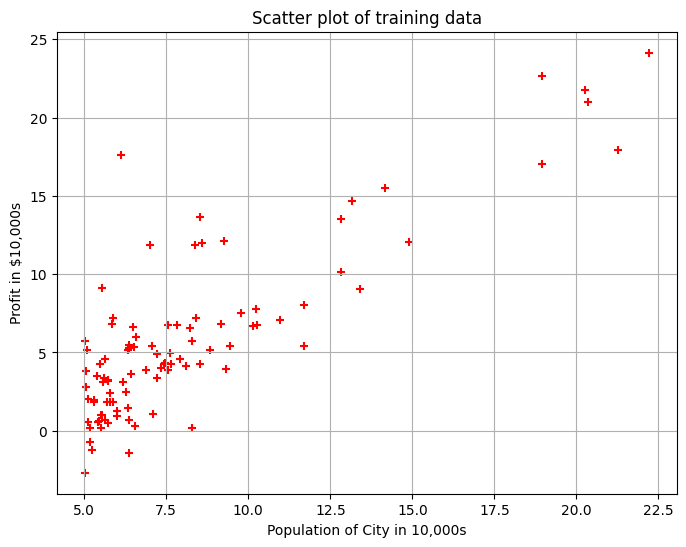

In [ ]:
X = df.values[:, 0]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 1]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X_1 = X.reshape(m, 1)
X_1[:10]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829],
       [7.4764],
       [8.5781],
       [6.4862],
       [5.0546]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [-3.63029144  1.16636235]
cost_history = [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


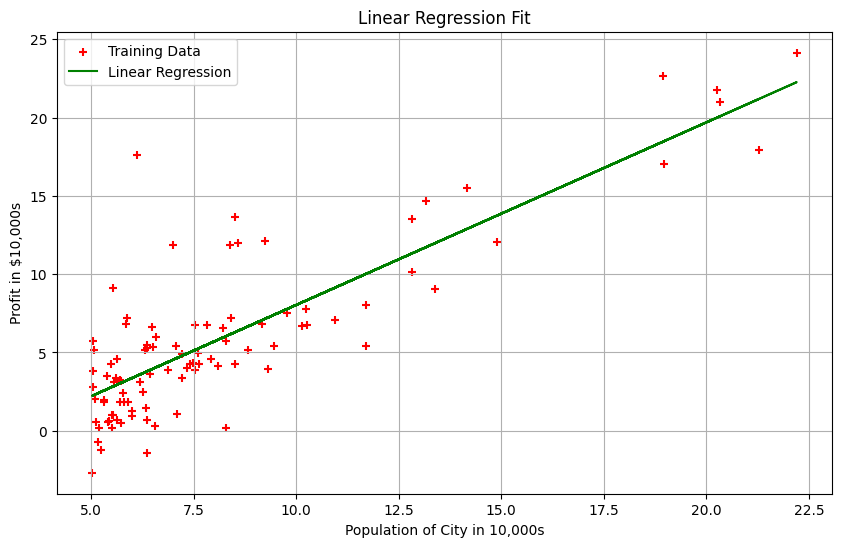

In [ ]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


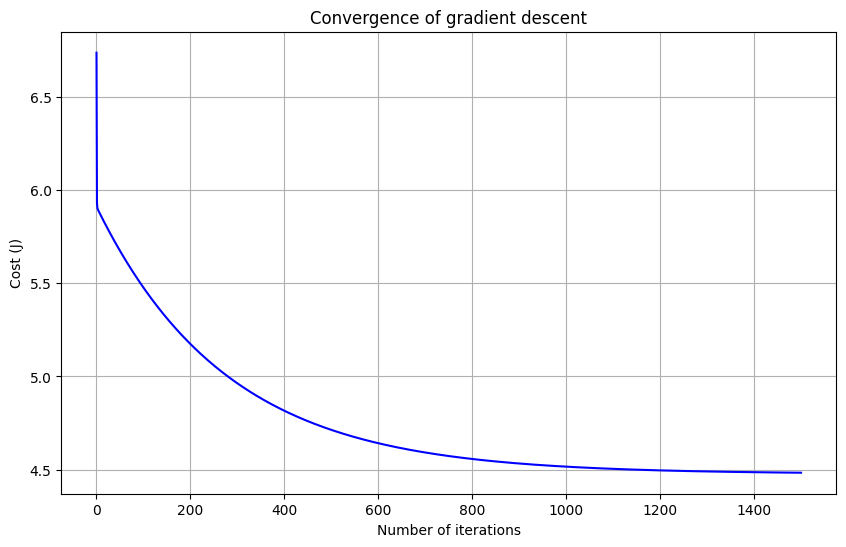

In [ ]:


plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()